In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([2,5])
y = np.array([4,7])
x , y , x*y , np.dot(x,y)

(array([2, 5]), array([4, 7]), array([ 8, 35]), np.int64(43))

In [3]:
np.array(x)

array([2, 5])

In [4]:
M = np.array([[2.0,5.0],[1.0,4.0]])
M, np.dot(M,x)

(array([[2., 5.],
        [1., 4.]]),
 array([29., 22.]))

Tenemos un sistema de ecuaciones diferenciales ordinarias
$$
\frac{d\vec x}{dt} = \vec g(\vec x,t)
$$

$$
\vec x_{n+1} = \vec x_n + \delta \vec g(\vec x_n,t_n) +\frac{\delta ^2}{2} \mathbb{J}(\vec x_n,t_n) \cdot \vec g(\vec x_n,t_n)
$$

donde $\delta$ es paso de integración y $\vec x$ son variables del sistema de ecuaciones diferenciales.

In [5]:
def pendulo_simple(x , w2=1):
    # x = (theta, v_theta)
    return np.array([ x[1] , -w2*np.sin(x[0]) ])

def J_pendulo_simple(x , w2=1):
    # J = [(0, 1) , (-w2 cos(th) , 0)]
    return np.array([[0, 1] , [-w2*np.cos(x[0]) , 0]])
    
def EDO_Euler(g,x0,t):
    #para un sistema autonomo
    h , sol = t[1]-t[0] , np.zeros( (len(x0),len(t)) )
    sol[:,0] = x0 #condicion inicial
    for i in range(len(t)-1):
        sol[:,i+1] = sol[:,i] + h*g(sol[:,i])
    return sol

def EDO_Jac(g,Jac,x0,t):
    #para un sistema autonomo
    h , sol = t[1]-t[0] , np.zeros( (len(x0),len(t)) )
    sol[:,0] = x0 #condicion inicial
    for i in range(len(t)-1):
        sol[:,i+1] = sol[:,i] + h*g(sol[:,i]) + 0.5*(h**2)*np.dot( Jac(sol[:,i]), g(sol[:,i]) )
    return sol

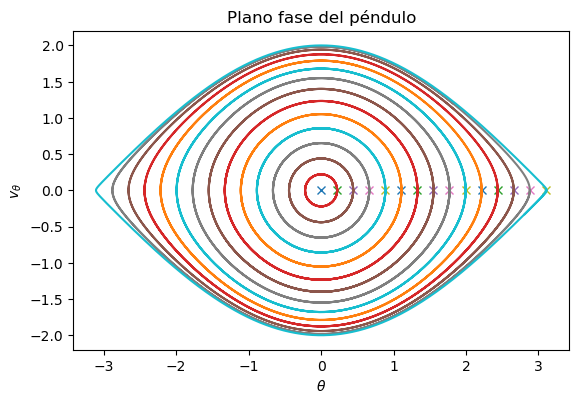

In [6]:
t = np.arange(0,8*np.pi,0.0001)
th_0 = np.linspace(0,3.1,15)
for th in th_0:
    sol_pendulo = EDO_Euler(pendulo_simple,[th,0],t)
    plt.plot(sol_pendulo[0,0],sol_pendulo[1,0],'x')
    plt.plot(sol_pendulo[0,:],sol_pendulo[1,:])
plt.title('Plano fase del péndulo')
plt.xlabel(r'$\theta$'),plt.ylabel(r'$v_{\theta}$'),
plt.gca().set_aspect('equal')
plt.show()

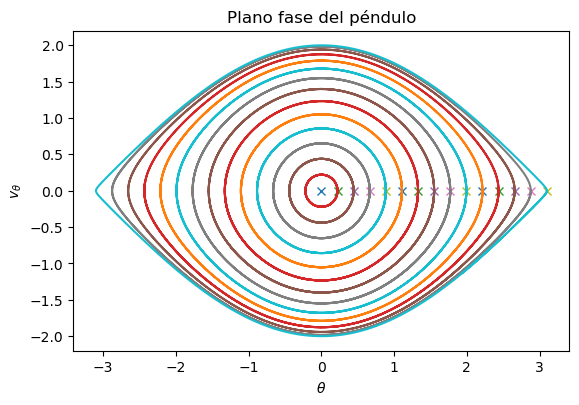

In [7]:
t = np.arange(0,8*np.pi,0.01)
th_0 = np.linspace(0,3.1,15)
for th in th_0:
    sol_pendulo = EDO_Jac(pendulo_simple,J_pendulo_simple,[th,0],t)
    plt.plot(sol_pendulo[0,0],sol_pendulo[1,0],'x')
    plt.plot(sol_pendulo[0,:],sol_pendulo[1,:])
plt.title('Plano fase del péndulo')
plt.xlabel(r'$\theta$'),plt.ylabel(r'$v_{\theta}$'),
plt.gca().set_aspect('equal')
plt.show()

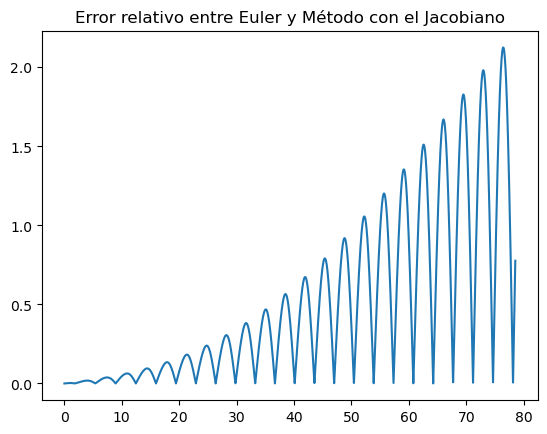

In [8]:
t = np.arange(0,25*np.pi,0.01)
sol_pendulo_e = EDO_Euler(pendulo_simple,[1,0],t)
sol_pendulo_j = EDO_Jac(pendulo_simple,J_pendulo_simple,[1,0],t)
err_rel = abs(sol_pendulo_e[0,:] - sol_pendulo_j[0,:])
plt.title('Error relativo entre Euler y Método con el Jacobiano')
plt.plot(t,err_rel)
plt.show()

$$
\ddot \theta + \omega ^2 \sin \theta = A \cos \omega_1 t
$$

$$
\dot \theta  = v_{\theta} \\
\dot v_{\theta} = - \omega ^2 \sin \theta + A \cos \omega_1 t
$$

$$
\mathbb{J}^* = 
\left ( \begin{matrix}
0 & 1 & 0\\
-\omega^2 \cos\theta & 0 & -\omega _1 A \sin \omega_1 t
\end{matrix}
\right)
$$